In [67]:
import numpy as np
import torch as th
import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt

from svpg.agents.env import make_env, EnvAgentAutoReset

In [13]:
directory = "../outputs/2022-05-04/22-08-05/archives/05-04_22-08/algo_base/"

In [34]:
with open(directory + "agents/all_action_agent/action_agent_0", "rb") as f:
    agent = th.load(f)
agent


CActionAgent(
  (model): Sequential(
    (0): Linear(in_features=4, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=25, bias=True)
    (5): ReLU()
    (6): Linear(in_features=25, out_features=1, bias=True)
  )
  (soft_plus): Softplus(beta=1, threshold=20)
)

In [53]:
env = make_env(env_name='CartPole-v1', max_episode_steps="100")

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ...,  1.,  1., -1.],
       [ 1.,  1., -1., ...,  1., -1., -1.]])

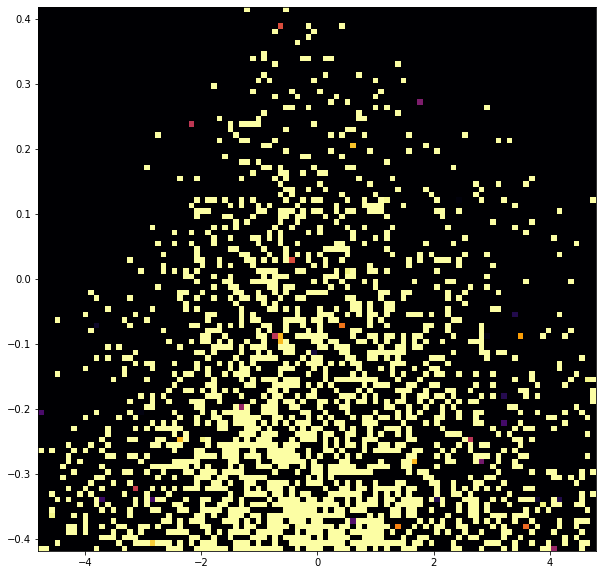

In [60]:
definition = 100
portrait = np.zeros((definition, definition))
state_min = env.observation_space.low
state_max = env.observation_space.high

for index_x, x in enumerate(
    np.linspace(state_min[0], state_max[0], num=definition)
):
    for index_y, y in enumerate(
        np.linspace(state_min[2], state_max[2], num=definition)
    ):
        obs = np.array([x])
        z1 = random.random() - 0.5
        z2 = random.random() - 0.5
        obs = np.append(obs, z1)
        obs = np.append(obs, y)
        obs = np.append(obs, z2)
        obs = th.from_numpy(obs.astype(np.float32))

        value = agent.cpu().forward(-1, stochastic=True, observation=obs)

        portrait[definition - (1 + index_y), index_x] = value.item()

plt.figure(figsize=(10, 10))
plt.imshow(
    portrait,
    cmap="inferno",
    extent=[state_min[0], state_max[0], state_min[2], state_max[2]],
    aspect="auto",
)

In [58]:
delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

Text(0.5, 1.0, 'Simplest default with labels')

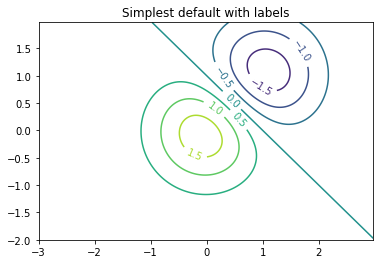

In [59]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z)
ax.clabel(CS, inline=True, fontsize=10)
ax.set_title('Simplest default with labels')

In [72]:
from salina.workspace import Workspace
from salina.agents import TemporalAgent

In [73]:
workspace = Workspace()
env_agent = EnvAgentAutoReset(env_name='CartPole-v1', max_episode_steps="100", n_envs=8)
agent = TemporalAgent(agent)

In [75]:
agent(workspace, t=0, stochastic=True, n_steps=32)

AssertionError: 